In [ ]:
using Pkg
Pkg.add("Images")
Pkg.add("MultivariateStats")
Pkg.add("FileIO")
Pkg.add("Glob")

In [2]:
using Images
using FileIO
using Glob
using MultivariateStats
using LinearAlgebra

In [4]:
function image_pca(image_path::String; num_components::Int = 100)
    # Load the image
    image = load(image_path)

    # Convert image to grayscale (if needed)
    image = Gray.(image)

    # Convert the image matrix to Float64 for PCA
    image_matrix = Float64.(image)

    # Perform PCA along the columns (features are columns)
    pca_model = fit(PCA, image_matrix; maxoutdim=num_components)

    # Transform the image using PCA
    reduced_image = transform(pca_model, image_matrix)

    reconstructed_image = reconstruct(pca_model, reduced_image)

    # Normalize the reconstructed image to the range [0, 1]
    min_val = minimum(reconstructed_image)
    max_val = maximum(reconstructed_image)
    normalized_image = (reconstructed_image .- min_val) ./ (max_val - min_val)

    # Convert back to grayscale format
    reconstructed_image_grayscale = Gray.(normalized_image)

    return reconstructed_image_grayscale
end;

In [5]:
# Process all images in a folder
function process_images_in_folder(folder_path::String; num_components::Int = 100, output_folder::String = "Processed")
    # Get all image files in the folder
    image_files = glob("*.png", folder_path)  # Adjust pattern for other formats like *.jpg, *.jpeg, etc.

    # Create output folder if it doesn't exist
    if !isdir(output_folder)
        mkdir(output_folder)
    end

    # Process each image
    for image_path in image_files
        reduced_image = image_pca(image_path; num_components=num_components)

        original_name = basename(image_path)
        new_name = "reduced_$(original_name)"
        save_dir = joinpath(output_folder, new_name)  # Create the save path
        save(save_dir, reduced_image)
        display(reduced_image)
    end
end;

In [11]:
folder_path = joinpath(@__DIR__, "../dat")
output_folder = joinpath(@__DIR__, "../fig");

## 50 components

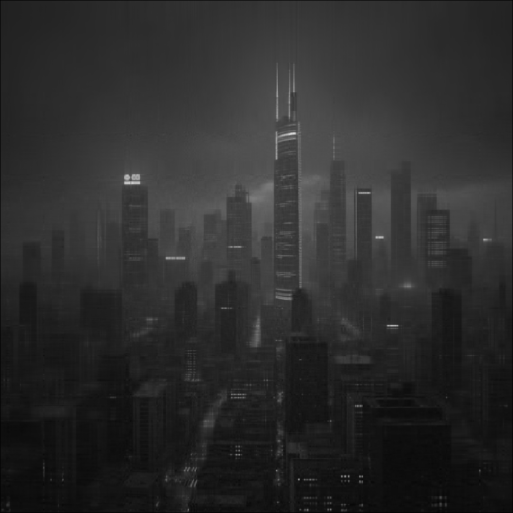

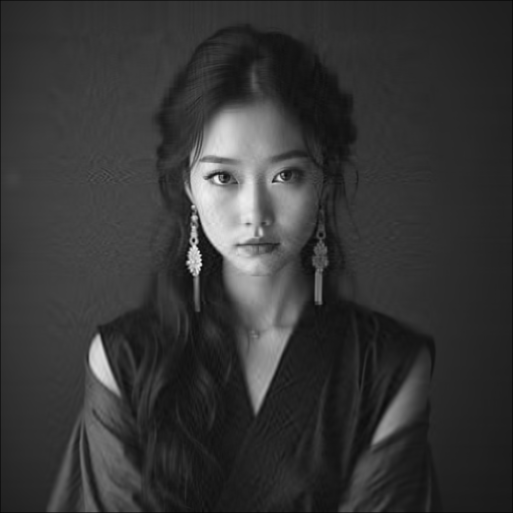

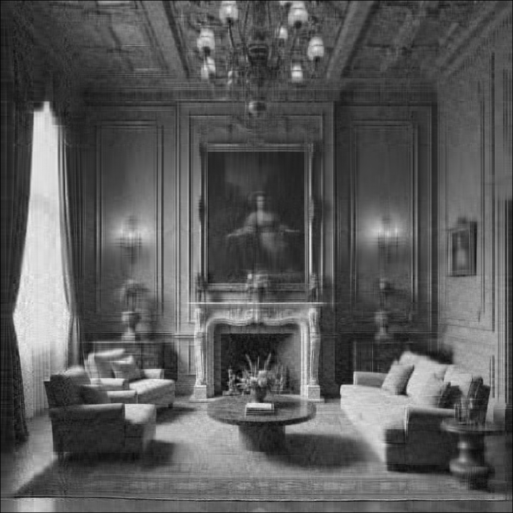

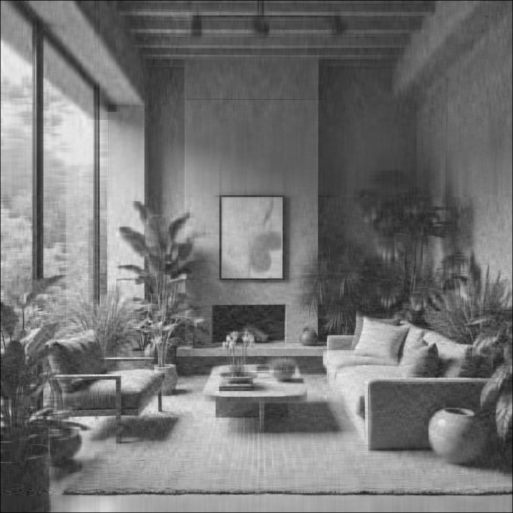

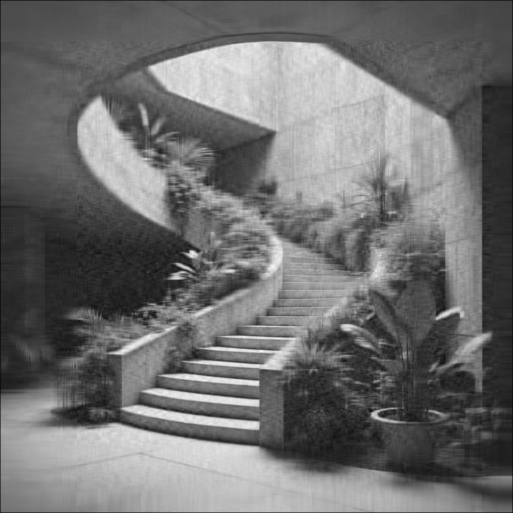

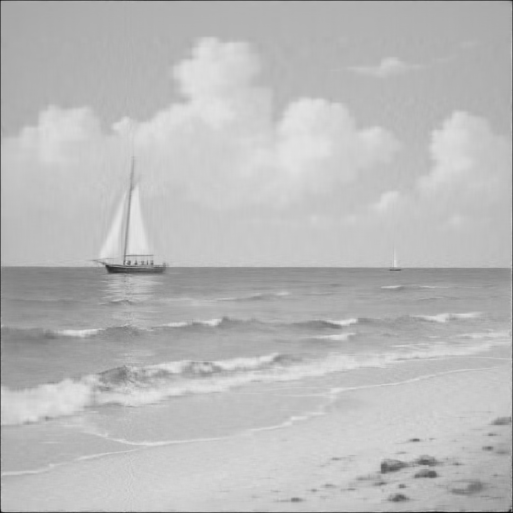

In [12]:
process_images_in_folder(folder_path, num_components=50, output_folder=output_folder)

## 25 components

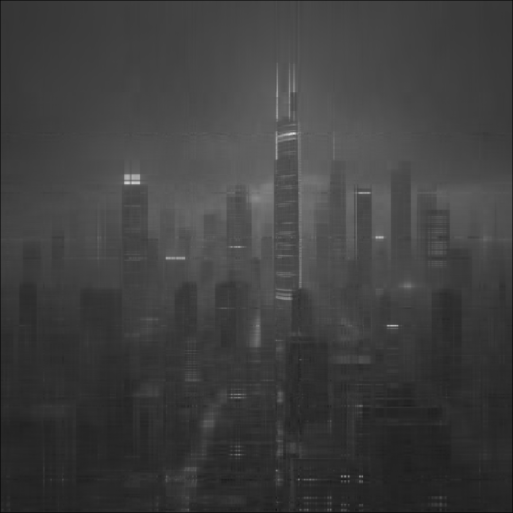

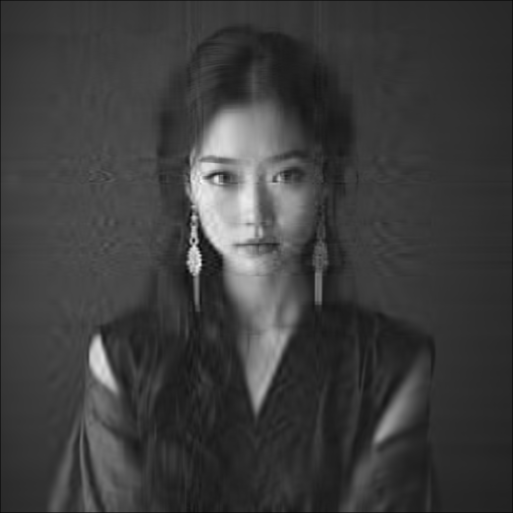

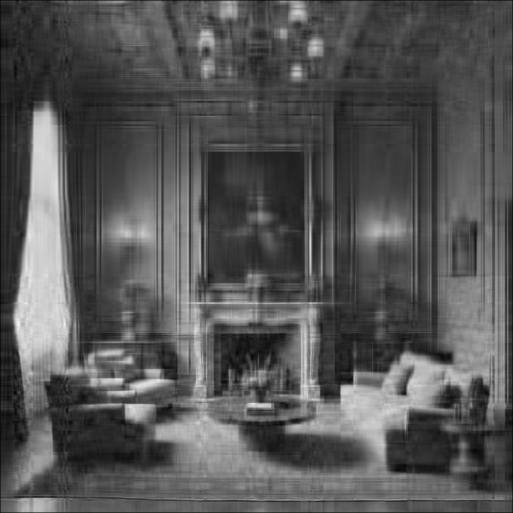

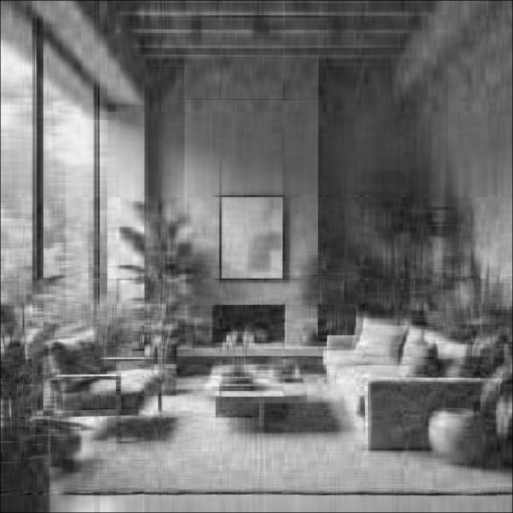

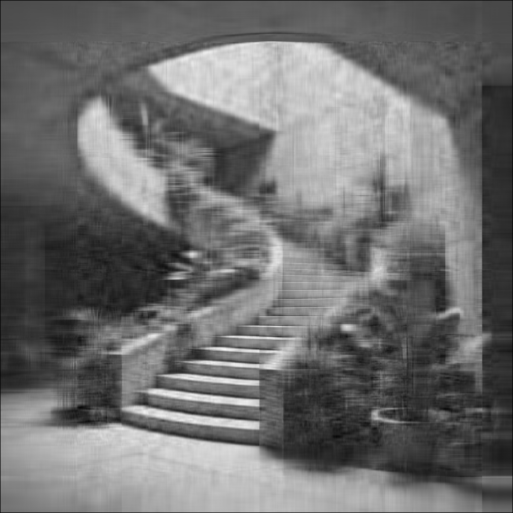

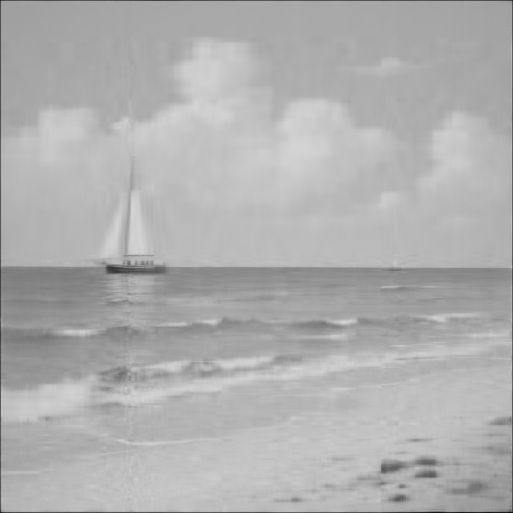

In [13]:
process_images_in_folder(folder_path, num_components=25, output_folder=output_folder)

## 10 components

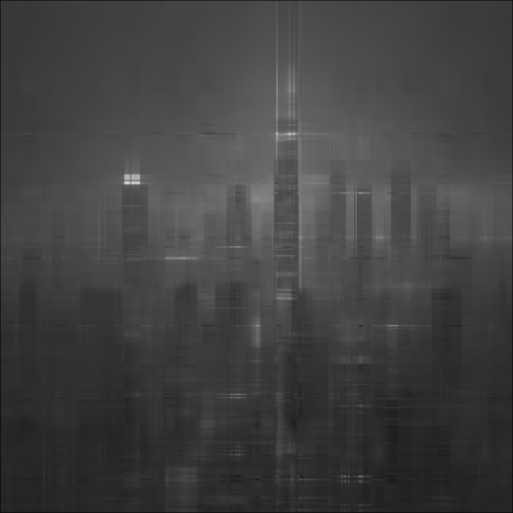

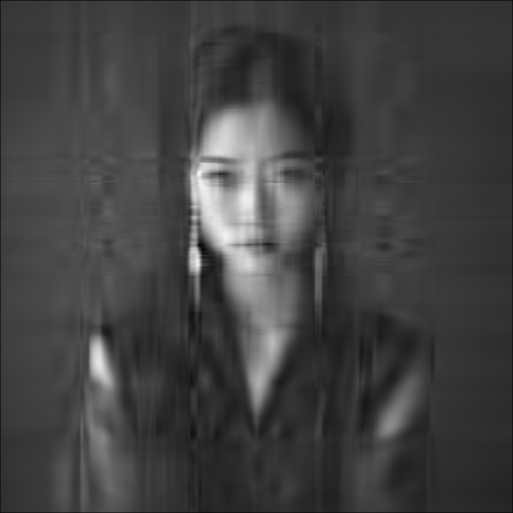

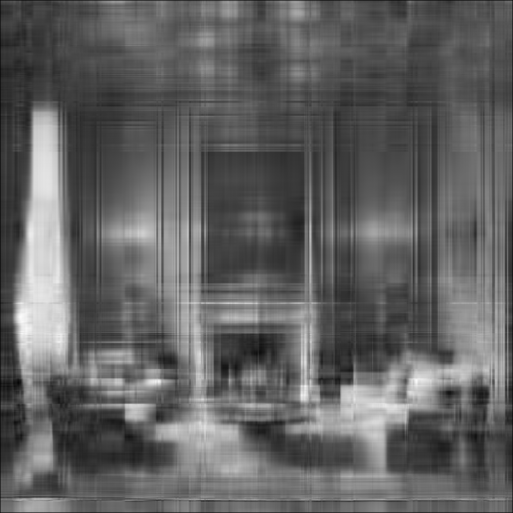

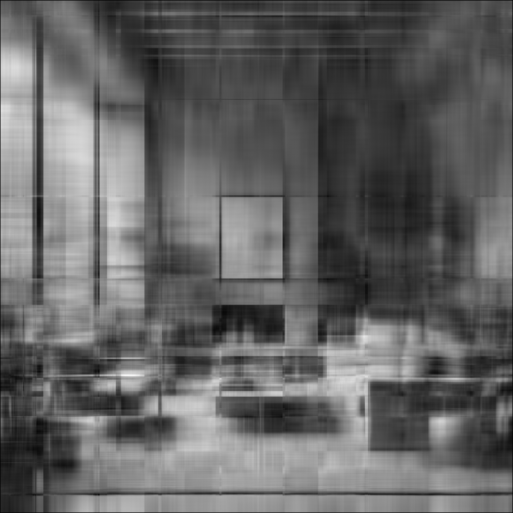

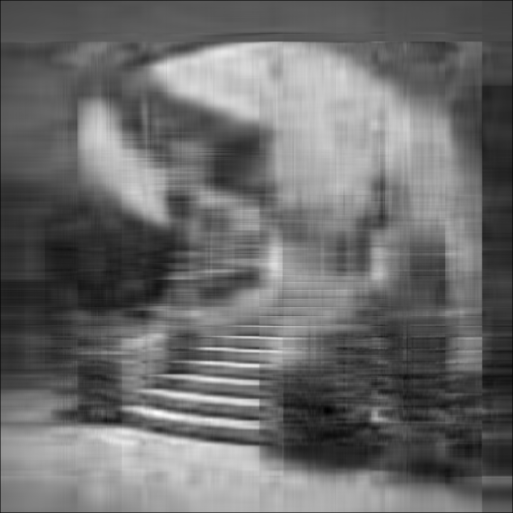

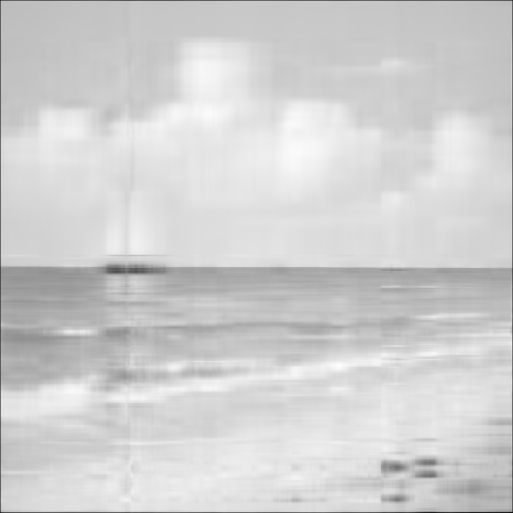

In [14]:
process_images_in_folder(folder_path, num_components=10, output_folder=output_folder)